In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [7]:
x , y= make_classification(n_samples= 1000, n_features= 4, n_classes= 2, random_state= 1)

In [8]:
x.shape
x

array([[ 1.91518414,  1.14995454, -1.52847073,  0.79430654],
       [ 1.4685668 ,  0.80644722, -1.04912964,  0.74652026],
       [ 1.47102089,  0.90060386, -1.20228498,  0.57845433],
       ...,
       [-2.14648492, -0.24693238,  0.01337634, -2.79100527],
       [-2.62889557, -1.18505478,  1.45623708, -1.80807547],
       [ 0.50047097,  0.81763526, -1.24302955, -0.73584899]])

In [9]:
y.shape
y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 4), (300, 4), (700,), (300,))

In [16]:
model = KNeighborsClassifier(n_neighbors= 3)

In [17]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = model.predict_proba(x_test)

In [19]:
y_pred.shape

(300, 2)

In [22]:
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

np.float64(0.8768235189468065)

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

In [26]:
fpr

array([0.        , 0.09090909, 0.18831169, 0.38961039, 1.        ])

In [27]:
tpr

array([0.        , 0.65753425, 0.8630137 , 0.93835616, 1.        ])

In [31]:
thresholds

array([       inf, 1.        , 0.66666667, 0.33333333, 0.        ])

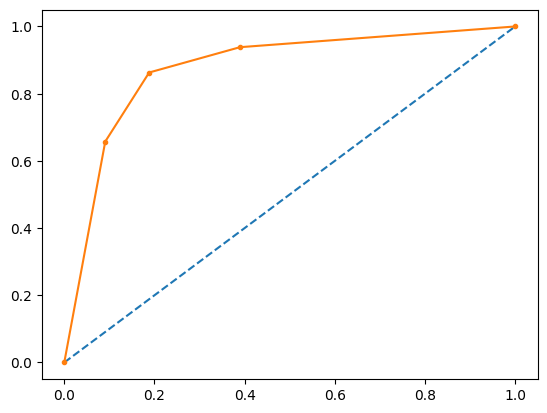

In [34]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')